# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

$$a=\bar{y} - b\bar{x}$$ as $$\frac{\partial L}{\partial a} = -2\sum_{i=0}^{n}(y_i-a-bx_i) = 0$$ where we equate to zero for minimisation. When dividing by 2n and rearranging we arrive at our expression, which also minimises thex`x Hessian.

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

When minimising any function, there is always the possibility that multiple global minima are there. In the case of OLS, the loss function is a second degree polynomial, so it has a global minimum. If however, there is multicollinearity  between a and b (which is very unlikely), it could be that the values cannot be approximated. 

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

    No, MSE and SSE differ by a constant factor 1/n, when equating the derivative to 0, this constant factor can be accounted for, resulting in the same result.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

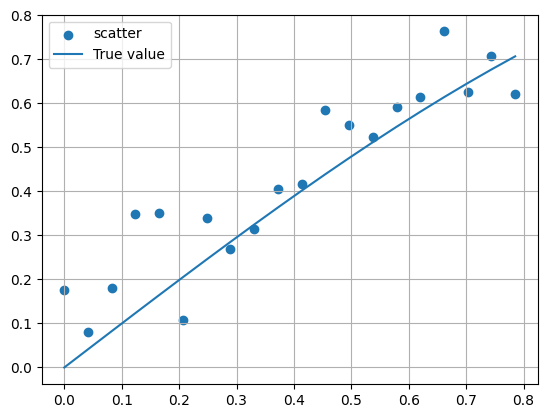

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_sin(x, epsilon, n):
    result = []
    #epsilon = 0 geeft pure sin
    if epsilon == 0:
        for i in range(n):
            result.append(np.sin(x[i]))
        return result
    noise = np.random.normal(0, epsilon,n)
    for i in range(n):
        result.append(np.sin(x[i]) + noise[i])
    return result

n_samples = 20

# TODO: create noisy function
x = np.linspace(0,np.pi/4,n_samples)
y = generate_sin(x, 0.1, n_samples)

# TODO: create true function
x_pure = x
y_pure = generate_sin(x_pure, 0, n_samples)

# TODO: plot data, line
plt.scatter(x,y, label="scatter")
plt.plot(x_pure, y_pure, label="True value")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

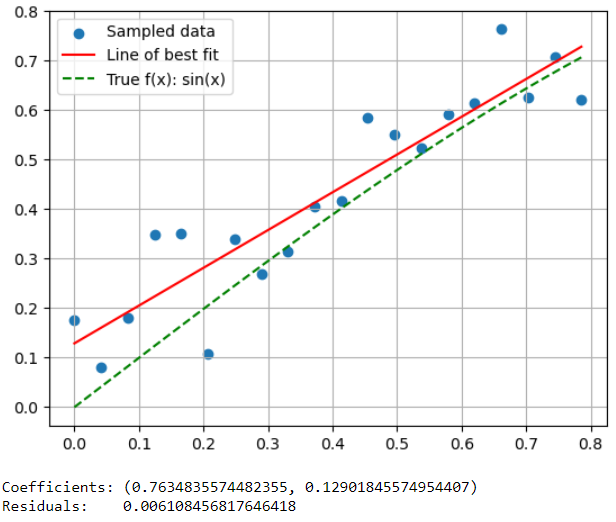

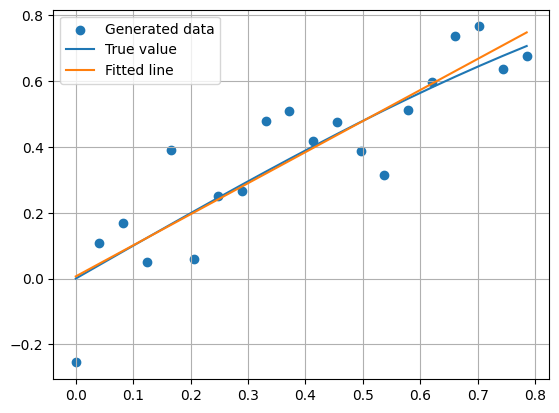

Coefficients: (0.006497649906463621, 0.9446970749063273)
RSS:    0.000200586126766646


In [7]:
def compute_sos(y_true, y_pred):
    sos=0
    for i in range(len(y_true)):
        sos += (y_true[i]-y_pred[i])**2
    return sos

def lin_reg(xs, ys):
    x_bar = np.mean(xs)
    y_bar = np.mean(ys)
    
    b_numerator = 0
    b_denominator = 0
    for i in range(len(xs)):
       b_numerator += (xs[i]-x_bar)*(ys[i]-y_bar)
       b_denominator += (xs[i]-x_bar)**2
    b = b_numerator/b_denominator
    a = y_bar - b*x_bar
    
    y_pred = [a + b*x for x in xs]
    res = compute_sos(y_pure,y_pred)
    return a, b, res

def generate_sin(x, epsilon, n):
    result = []
    #epsilon = 0 geeft pure sin
    if epsilon == 0:
        for i in range(n):
            result.append(np.sin(x[i]))
        return result
    noise = np.random.normal(0, epsilon,n)
    for i in range(n):
        result.append(np.sin(x[i]) + noise[i])
    return result

# TODO: generate line of best fit
x = np.linspace(0,np.pi/4,n_samples)
y = generate_sin(x, 0.1, n_samples)
x_pure = x
y_pure = generate_sin(x_pure, 0, n_samples)
a, b, res = lin_reg(x,y)
res = res/n_samples
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x,y, label= "Generated data")
plt.plot(x_pure, y_pure, label="True value")
plt.plot(x, y_best, label="Fitted line")

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("RSS:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

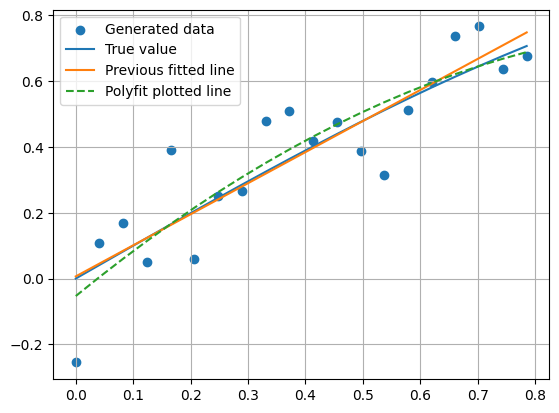

Coefficients:      (0.006497649906463621, 0.9446970749063273)
Residuals:         0.000200586126766646
Coefficients (np): [-0.61395312  1.42689473 -0.05329979]
Residuals (np):    0.000571732639210686


In [8]:
# TODO: use np polyfit here
coeffs_np = np.polyfit(x, y, deg=2)
y_best_np = np.polyval(coeffs_np, x)
res_np = compute_sos(y_pure, y_best_np)/n_samples

# TODO: plot everything you need to

plt.scatter(x,y, label= "Generated data")
plt.plot(x_pure, y_pure, label="True value")
plt.plot(x, y_best, label="Previous fitted line")
plt.plot(x, y_best_np, label="Polyfit plotted line", linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", coeffs_np)
print("Residuals (np):   ", res_np)

Polyfit, is a non-linear estimator> In this case it estiamtes with 2 variables up to $x^2$. Since the value of sin around the origin is a well-known estimator of a straight line, the OLS fit provides a slightly lowe residual mean.
 

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

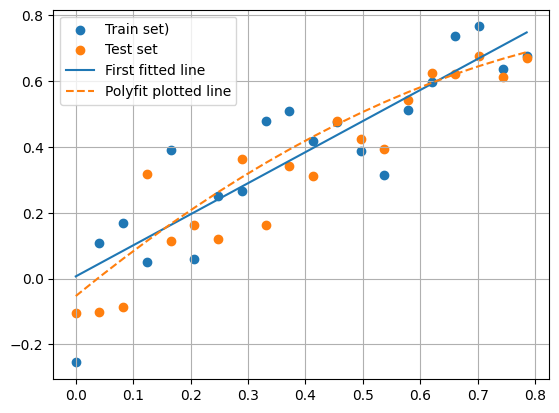

Coefficients:  (0.006497649906463621, 0.9446970749063273)
Train loss:    0.014832494048759231
Test loss:     0.011185875977261138


In [10]:
def compute_mse(y_true, y_pred, a, b):
    se = 0
    for i in range(len(y_true)):
            se += (y_true[i] - y_pred[i])**2
    mse = se / len(y_true)
    return mse
epsilon = 0.1
x_test = np.linspace(0,np.pi/4,n_samples)
y_test = generate_sin(x_test, epsilon, n_samples)

plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty
plt.plot(x, y_best, label="First fitted line")
plt.plot(x, y_best_np, label="Polyfit plotted line", linestyle='dashed')
plt.grid()
plt.legend()
plt.show()



test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

Theoretically, both the training and test losses should ideally be low, indicating that the model performs well on both the data it was trained on and unseen data from the test set. However, the training loss tends to be lower than the test loss because the model is optimized to minimize this loss during training.

In this specific scenario, the training loss is $0.0144$, while the test loss is $0.0044$. The test loss is lower, which is unusual and indicates that the model generalizes well to unseen data. This can happen due to various reasons:

\textbf{Small Test Set}: There is a small number of instances, n_samples is only 20.

\textbf{Similar Distribution}: The test and train set are generated from the exact same distribution, leading to good generalization.

\textbf{Low Noise}: Both test and train set have the same low noise, making it easier for the model to generalize.


## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

In [30]:
import numpy as np
import pandas as pd

epsilon_values = [0.05, 0.1, 0.15]
n_values = [50, 100, 150]

results = []

for epsilon in epsilon_values:
    for n in n_values:
        x_train = np.linspace(0, np.pi/4, n)
        y_train = generate_sin(x_train, epsilon, n)
        
        x_test = np.linspace(0, np.pi/4, n) 
        y_test = generate_sin(x_test, epsilon, n)
        
        a, b = np.polyfit(x_train, y_train, deg=1)  
        
        train_loss = compute_mse(x_train, y_train, a, b)
        test_loss = compute_mse(x_test, y_test, a, b)
        
        results.append({
            'Epsilon': epsilon,
            'N': n,
            'Train Loss': train_loss,
            'Test Loss': test_loss
        })

df = pd.DataFrame(results)
pivot_df = df.pivot(index='Epsilon', columns='N', values=['Train Loss', 'Test Loss'])
print(pivot_df)

        Train Loss                     Test Loss                    
N              50        100       150       50        100       150
Epsilon                                                             
0.05      0.002278  0.002991  0.003225  0.003225  0.002888  0.003207
0.10      0.009697  0.013583  0.009999  0.008900  0.011317  0.010560
0.15      0.019817  0.030751  0.021716  0.022576  0.025129  0.022345


See the added code block for computations. We see that given epsilon, if n increase from a small to a decent number a samples the loss increases as the number of samples keeps growing the loss will again decrease probably because of the 1/N term becoming more significant as N increases. Naturally, a higher epsilon results in higher losses regardless the number of samples.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

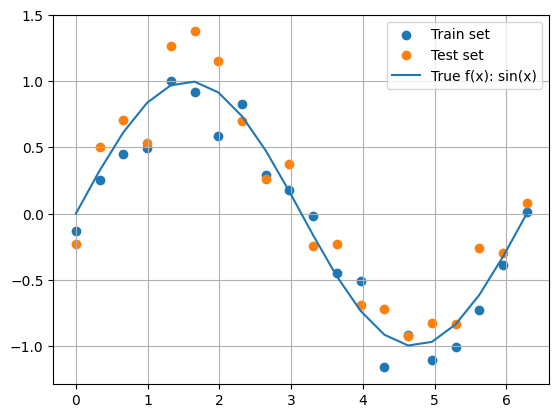

In [11]:
# TODO: generate new data and plot
n_samples = 20
x = np.linspace(0, 2*np.pi, n_samples)
y_train = generate_sin(x, 0.2, n_samples)
y_test = generate_sin(x,0.2, n_samples)

x_pure = x
y_pure = generate_sin(x,0,n_samples)

plt.scatter(x,y_train, label="Train set")
plt.scatter(x,y_test, label="Test set")

plt.plot(x,y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

C:\Users\mopor\AppData\Local\Temp\ipykernel_26496\2651178132.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x,y_train, degree)
C:\Users\mopor\AppData\Local\Temp\ipykernel_26496\2651178132.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x,y_train, degree)
C:\Users\mopor\AppData\Local\Temp\ipykernel_26496\2651178132.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x,y_train, degree)


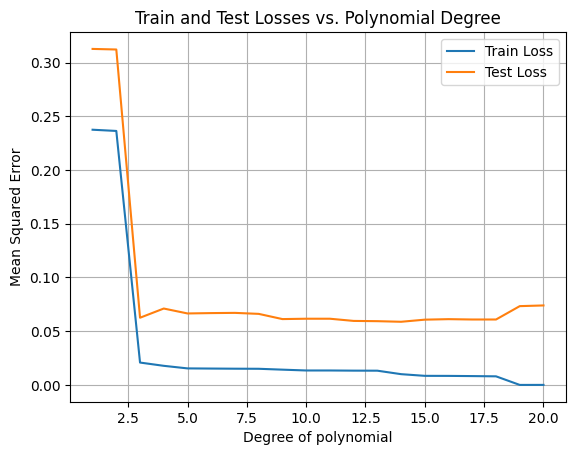

In [13]:
#training on test set 
degrees = range(1,21)
train_losses = []
test_losses = []
coefficients = []

for degree in degrees:
    coeffs = np.polyfit(x,y_train, degree)
    coefficients.append(coeffs)
    
    y_pred_train = np.polyval(coeffs, x)
    y_pred_test = np.polyval(coeffs, x)
    
    #I choose to compute loss directly
    train_loss = np.mean((y_pred_train - y_train)**2)
    test_loss = np.mean((y_pred_test - y_test)**2)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(degrees, train_losses, label="Train Loss")
plt.plot(degrees, test_losses, label="Test Loss")
plt.xlabel("Degree of polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test Losses vs. Polynomial Degree")
plt.legend()
plt.grid()
plt.show()


    

**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

This warning implies that the polynomial fitting process might produce unreliable results due to numerical instability, potentially leading to inaccuracies or unexpected behaviors in the fitted polynomial coefficients. 

*Add your text answer here*

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

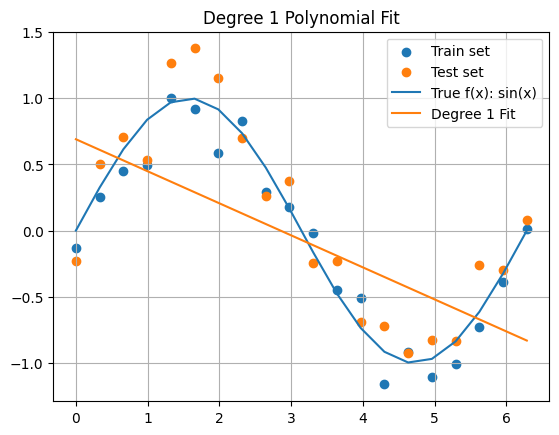

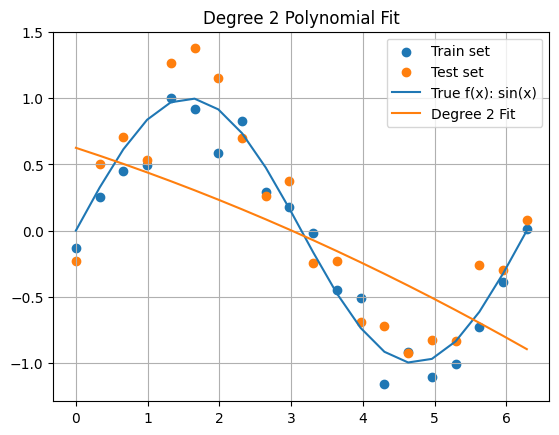

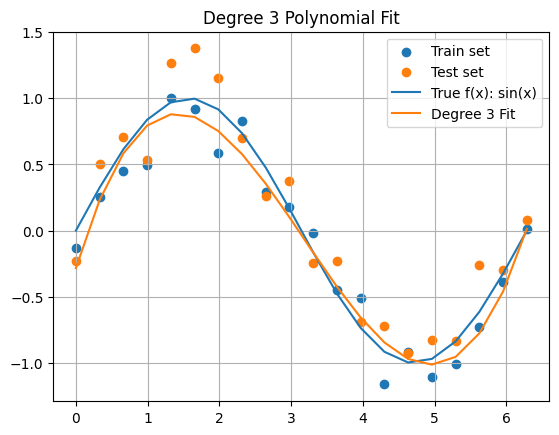

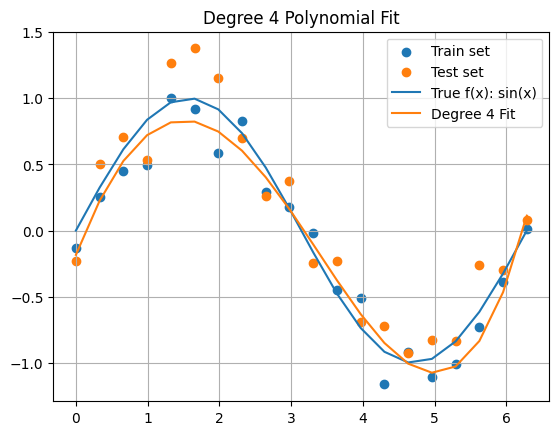

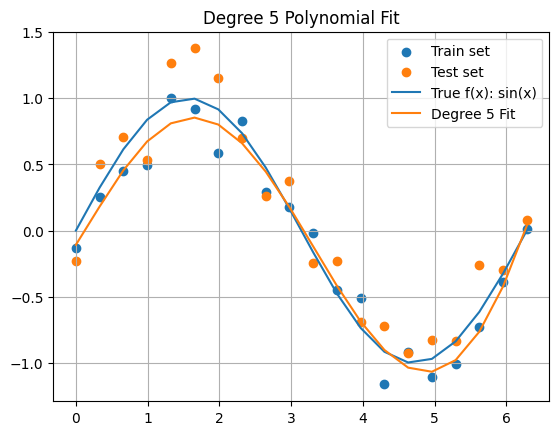

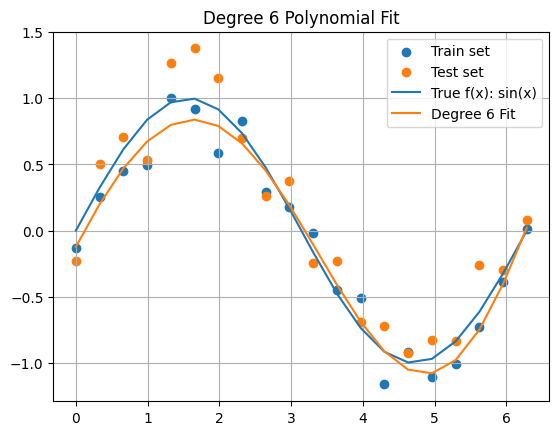

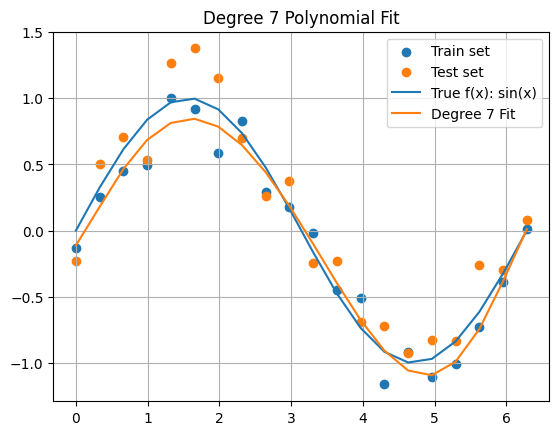

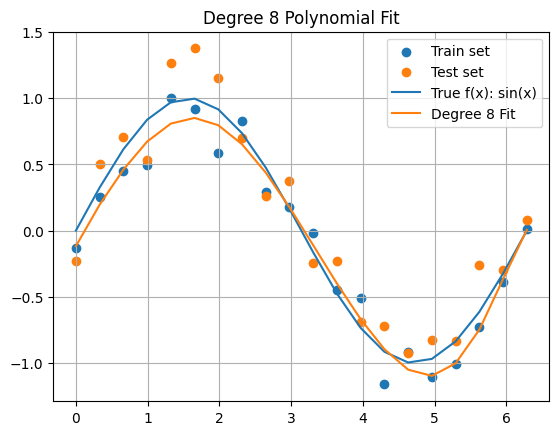

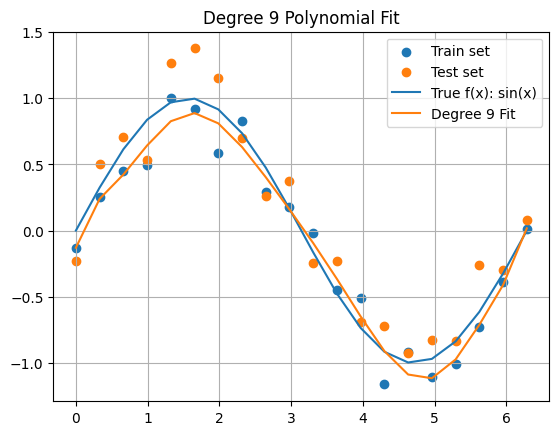

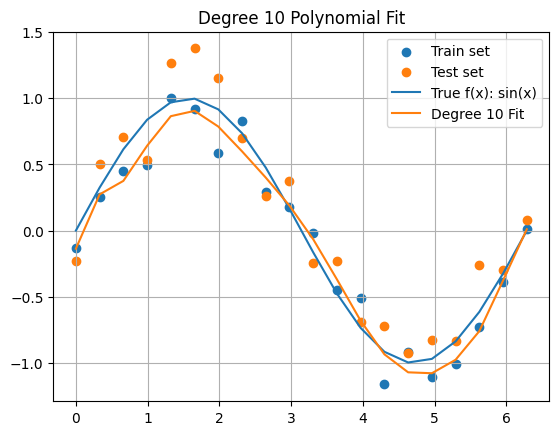

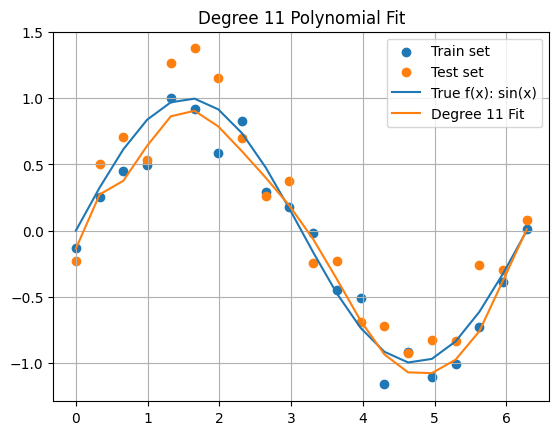

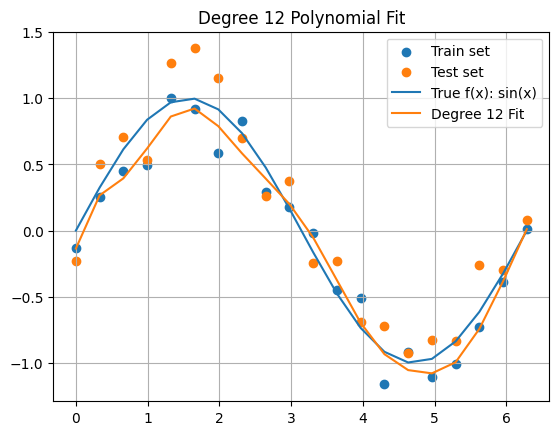

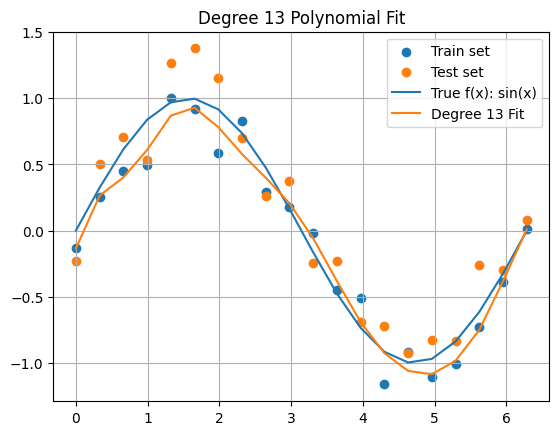

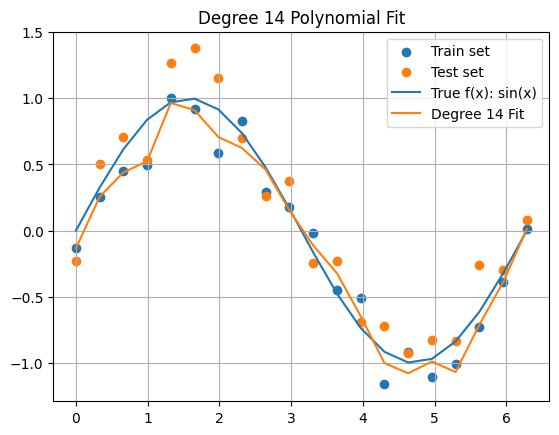

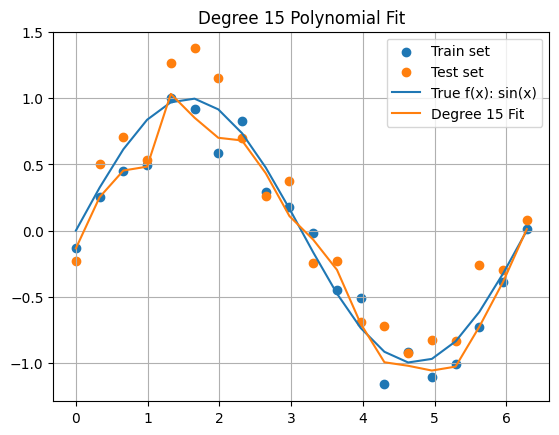

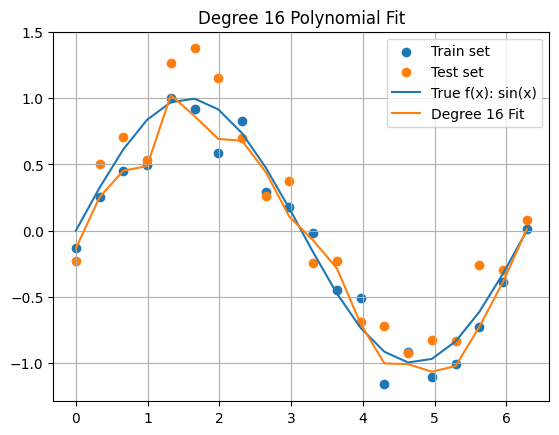

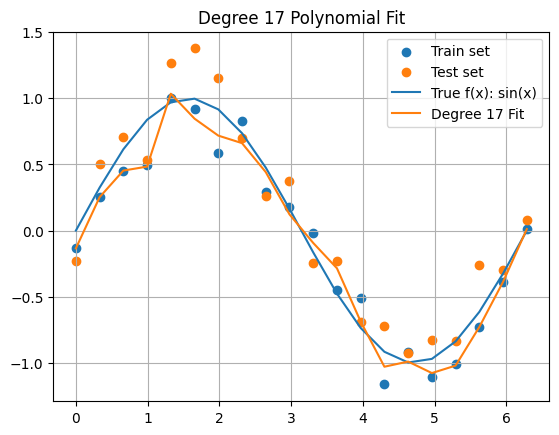

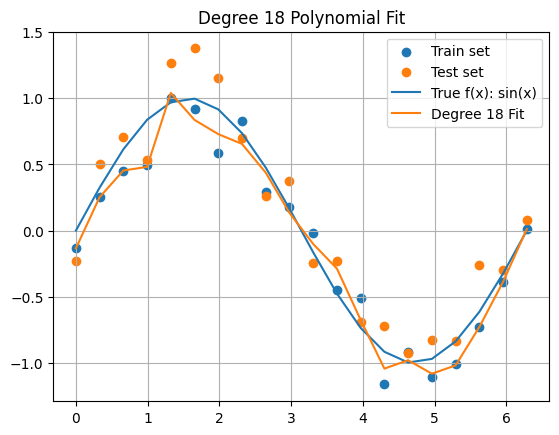

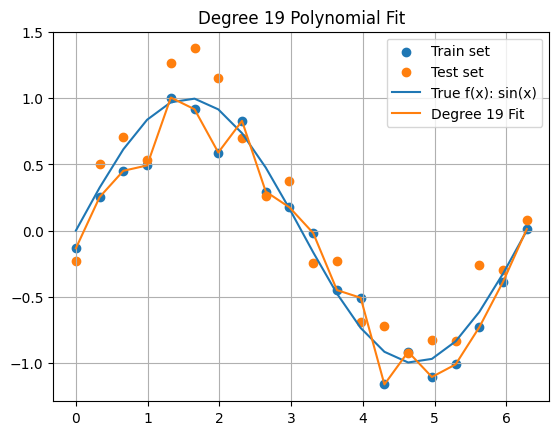

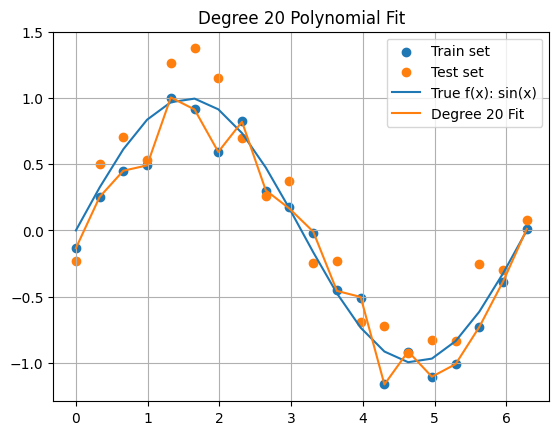

In [14]:
for degree, coeffs in zip(degrees, coefficients):
    plt.figure()
    plt.scatter(x, y_train, label="Train set")
    plt.scatter(x, y_test, label="Test set")
    plt.plot(x, y_pure, label="True f(x): sin(x)")
    
    y_pred = np.polyval(coeffs, x)
    
    plt.plot(x, y_pred, label=f"Degree {degree} Fit")
    
    plt.grid()
    plt.legend()
    plt.title(f"Degree {degree} Polynomial Fit")
    plt.show()


Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

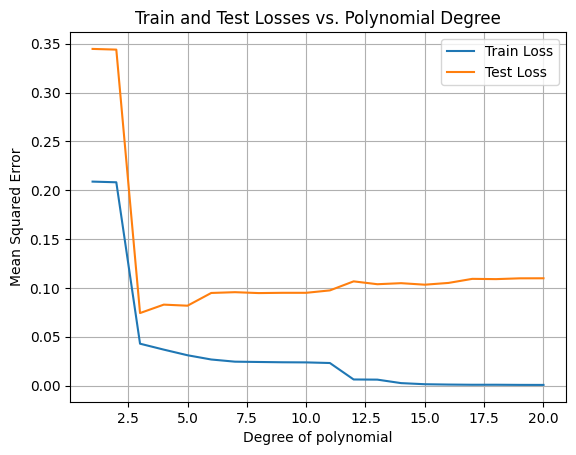

In [38]:
plt.plot(degrees, train_losses, label="Train Loss")
plt.plot(degrees, test_losses, label="Test Loss")
plt.xlabel("Degree of polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test Losses vs. Polynomial Degree")
plt.legend()
plt.grid()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. When degree = 10 - 12 you can see the overfitting starting, because we observe that the fit is "tweaked" to include specific entries from the training data
2. The fully overfitted 20-degree one fits best on the train data, as all points are included (this is bad). In the test data we see the best fit between 5 and 7, because from 8 onward, the boundary sample points are fully intersected, while before 8 the edges are still quite smooth
4. Again looking at the edges, it can be observed that from degree 13 boundary sample points are fully intersected. So I would say from 13, but it is difficult to visually infer due to crowdedness of points 
5. No, model flexibility depends on factors beyond data quantity, including model complexity/well-definedness, noise level, underlying data distribution, model selection preferences, and data quality (are there missing/interpolated observations (the latter induces heteroskedasticity )?). Simply adding more data may not improve flexibility if the model lacks previously mentioned factors.